In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import torch.utils.data as Data
import matplotlib.pyplot as plt
from IPython import display
from tqdm.auto import tqdm

In [2]:
LR = 0.05
BATCH_SIZE = 25
EPOCHES = 1000

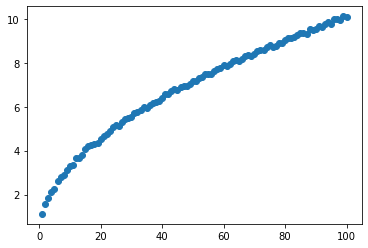

In [3]:
x = torch.linspace(1, 100, 100)
x = torch.unsqueeze(x, dim=1)
y = torch.sqrt(x) + 0.2 * torch.rand_like(x)

dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

plt.scatter(x, y)

In [4]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(1, 50),
            torch.nn.ReLU(),

            torch.nn.Linear(50, 100),
            torch.nn.ReLU(),

            torch.nn.Linear(100, 1)
        )

        self.criterion = torch.nn.L1Loss()
        self.opt = torch.optim.Adam(self.parameters(), lr=LR)

    def forward(self, x):
        return self.net(x)

model = Net()
# print(model)

In [5]:
train_loss = []
train_loss_record = []

for epoch in range(EPOCHES):
    train_loss = []
    for step, (batch_x, batch_y) in enumerate(loader):      # tqdm(enumerate(loader))
        batch_predict = model(batch_x)
        loss = model.criterion(batch_predict, batch_y)

        model.opt.zero_grad()
        loss.backward()
        model.opt.step()

        train_loss.append(loss)

    train_loss = sum(train_loss) / len(train_loss)
    train_loss_record.append(loss.item())

In [ ]:
x = np.arange(len(train_loss_record))
plt.plot(x, train_loss_record)
# plt.ylim([0, 2])
plt.title("Loss")
plt.show()

In [ ]:
x = torch.linspace(1, 100, 100)
x = torch.unsqueeze(x, dim=1)
y = torch.sqrt(x) + 0.2 * torch.rand_like(x)

x, y = Variable(x), Variable(y)

predict = model(x)
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), predict.data.numpy(), 'r-')
plt.show()